Assignment 3

Done by :
1.   Liu Yao Hong (G2203319C) Email:liuy0220@e.ntu.edu.sg
2.   Patricia Njo (G2205032J) Email:patricia003@e.ntu.edu.sg
3. Lam See Hwee (G2102084K) Email:seehwee001@e.ntu.edu.sg

In [1]:
## import libraries
import numpy as np
from IPython.display import Image, display
import numpy as np
import cv2 as cv
import numpy as np
import multiprocessing as mp
from scipy.ndimage import gaussian_filter
import random
import matplotlib.pyplot as plt
import os
from google.colab.patches import cv2_imshow

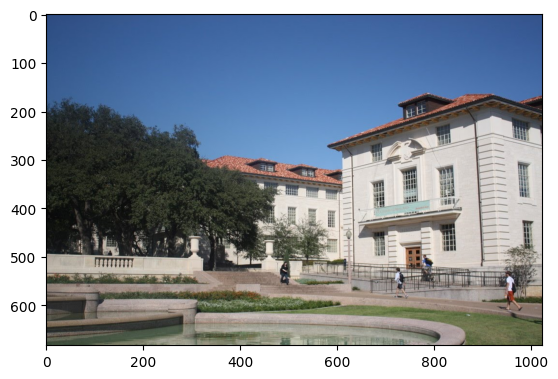

In [2]:
# Call the function with the image path
#Right Reference - Left is the transformation of the right side.
image_paths1='image pairs_03_01.jpg'
image_paths2='image pairs_03_02.jpg'
img1 = cv.imread(image_paths1)
img2 = cv.imread(image_paths2)
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))

Harris Corner

In [3]:
# def harris_corner(image_path):
#     # Load the image
#     image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

#     # Feature Detection
#     harris_block_size = 2
#     harris_ksize = 3
#     harris_k = 0.04

#     # Detect Harris corner in the image
#     corners = cv.cornerHarris(image, harris_block_size, harris_ksize, harris_k)

#     # Apply adaptive non-maximal suppression (ANMS) to find the most dominant corners
#     corners = cv.dilate(corners, None)
#     corner_threshold = 0.1 * corners.max()
#     corners[corners <= corner_threshold] = 0

#     # Create a copy of the original image for visualization
#     image_vis = cv.cvtColor(image, cv.COLOR_GRAY2BGR)

#     # Convert Harris corner to keypoints
#     keypoints = np.argwhere(corners > 0.01 * corners.max())
#     keypoints = [cv.KeyPoint(float(x[1]), float(x[0]), 13) for x in keypoints]

#     # Visualize Harris corner detection results on the image
#     image_vis[corners > 0.01 * corners.max()] = [0, 0, 255]

#     # Display Harris corner detection results on the image
#     cv2_imshow(image_vis)

#     # Return the keypoints and the result image
#     return (keypoints, image_vis)



In [4]:
def harris(img):
    gray_img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    gray_img = np.float32(gray_img)
    dst = cv.cornerHarris(gray_img, 2, 3, 0.04)
    result_img = img.copy() # deep copy image
    # Threshold for an optimal value, it may vary depending on the image.
    # draws the Harris corner key-points on the image (RGB [0, 0, 255] -> blue)
    result_img[dst > 0.01 * dst.max()] = [0, 0, 255]
    # for each dst larger than threshold, make a keypoint out of it
    keypoints = np.argwhere(dst > 0.01 * dst.max())
    keypoints = [cv.KeyPoint(float(x[1]), float(x[0]), 13) for x in keypoints]
    return (keypoints, result_img)

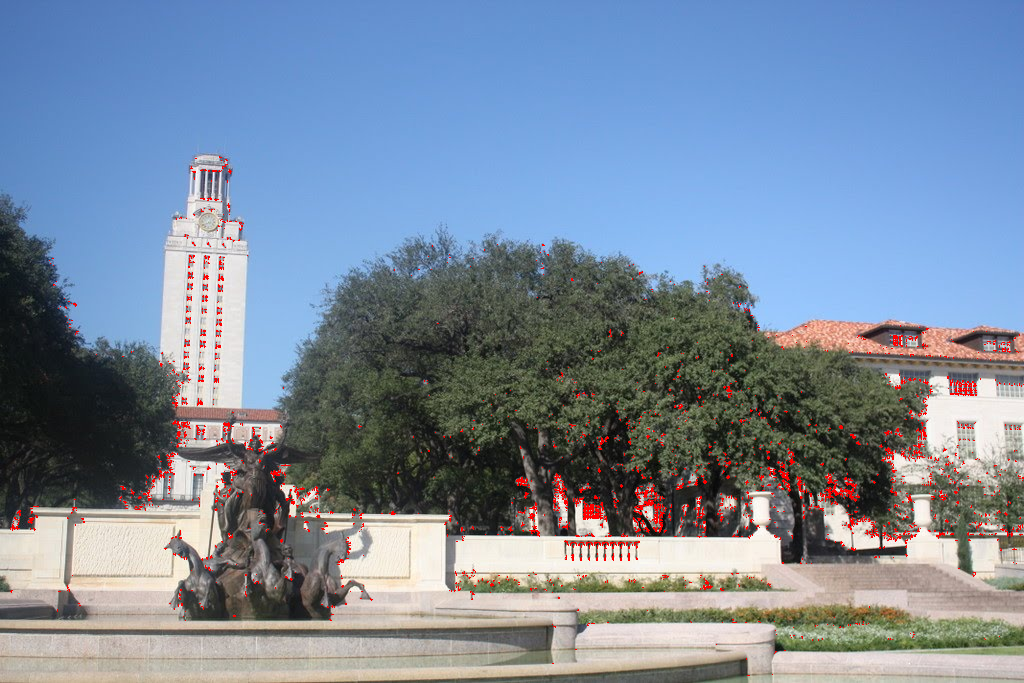

In [5]:
import cv2
#Call the Harris corner detection function
keypoints, result_img = harris(img1)
cv2_imshow(result_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## SIFT

In [6]:
def get_sift_descriptors(img):
    keypoints,result_img = harris(img)
    sift = cv.SIFT_create()
    _, descriptors = sift.compute(result_img, keypoints)
    return keypoints,descriptors,result_img

In [7]:

def matchKeyPoint(kp1, kp2, desc1, desc2, ratio=0.5):
    # Create a K-Nearest Neighbors matcher
    bfm = cv.BFMatcher()

    # Use k-NN matching (k=2) to get two best matches for each keypoint
    matches = bfm.knnMatch(desc1, desc2, k=2)

    # Apply ratio test to select good matches
    good_matches = []
    for m, n in matches:
        if m.distance < ratio * n.distance:
            good_matches.append(m)

    # Extract the matched keypoints' positions
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    #src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    #dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
    # Get the matched keypoint positions
    matches_pos = [(kp1[m.queryIdx], kp2[m.trainIdx]) for m in good_matches]

    return good_matches,src_pts,dst_pts,matches_pos


kp1, desc1,result_img1 = get_sift_descriptors(img1)
kp2, desc2,result_img2 = get_sift_descriptors(img2)


matches,src_pts,dst_pts,matches_pos=matchKeyPoint(kp1, kp2, desc1, desc2, ratio=0.9)

print(src_pts)

[[[548. 255.]]

 [[536. 260.]]

 [[733. 302.]]

 [[733. 303.]]

 [[738. 304.]]

 [[738. 305.]]

 [[738. 306.]]

 [[739. 306.]]

 [[900. 325.]]

 [[900. 326.]]

 [[919. 327.]]

 [[920. 334.]]

 [[806. 341.]]

 [[906. 343.]]

 [[804. 347.]]

 [[984. 350.]]

 [[978. 352.]]

 [[867. 353.]]

 [[869. 353.]]

 [[877. 353.]]

 [[953. 357.]]

 [[953. 358.]]

 [[887. 384.]]

 [[728. 396.]]

 [[729. 396.]]

 [[728. 397.]]

 [[729. 397.]]

 [[769. 411.]]

 [[767. 412.]]

 [[759. 415.]]

 [[761. 417.]]

 [[715. 418.]]

 [[761. 418.]]

 [[763. 418.]]

 [[713. 419.]]

 [[741. 422.]]

 [[569. 424.]]

 [[570. 424.]]

 [[571. 424.]]

 [[586. 424.]]

 [[743. 424.]]

 [[571. 425.]]

 [[572. 425.]]

 [[573. 425.]]

 [[574. 425.]]

 [[575. 425.]]

 [[586. 425.]]

 [[572. 426.]]

 [[571. 427.]]

 [[632. 427.]]

 [[635. 427.]]

 [[839. 427.]]

 [[647. 428.]]

 [[648. 428.]]

 [[649. 428.]]

 [[635. 429.]]

 [[649. 429.]]

 [[631. 430.]]

 [[653. 430.]]

 [[567. 431.]]

 [[632. 431.]]

 [[653. 431.]]

 [[654. 

In [8]:
##Draw the match points on images with keypoints and connection lines
#def drawMatches(img1, img2, matches_pos):

    # Get dimensions of input images
#    (img1_h, img1_w) = img1.shape[:2]
#    (img2_h, img2_w) = img2.shape[:2]

    # Initialize the output visualization image
#    match_image = np.zeros((max(img1_h, img2_h), img1_w + img2_w, 3), dtype="uint8")
#    match_image[0:img1_h, 0:img1_w] = img1
#    match_image[0:img2_h, img1_w:] = img2

    # Draw the matches
#    for (kp1, kp2) in matches_pos:
#        pos1 = (int(kp1.pt[0]), int(kp1.pt[1]))
#        pos2 = (int(kp2.pt[0] + img1_w), int(kp2.pt[1]))
#        cv.circle(match_image, pos1, 3, (0, 0, 255), 1)
#        cv.circle(match_image, pos2, 3, (0, 255, 0), 1)
#        cv.line(match_image, pos1, pos2, (255, 0, 0), 1)

    # Display and save the visualization image
#    plt.figure(figsize=(10, 10))
#    plt.title("Image with matching points")

#    plt.imshow(cv.cvtColor(match_image, cv.COLOR_BGR2RGB))
#    plt.show()

#    return match_image

In [9]:
#Draw the match points on images with keypoints and connection lines
def drawMatches(img1, img2, matches_pos):

    # Get dimensions of input images
    (img1_h, img1_w) = img1.shape[:2]
    (img2_h, img2_w) = img2.shape[:2]

    # Initialize the output visualization image
    match_image = np.zeros((max(img1_h, img2_h), img1_w + img2_w, 3), dtype="uint8")
    match_image[0:img1_h, 0:img1_w] = img1
    match_image[0:img2_h, img1_w:] = img2

    # Draw the matches
    for (kp1, kp2) in matches_pos:
        pos1 = (int(kp1.pt[0]), int(kp1.pt[1]))
        pos2 = (int(kp2.pt[0] + img1_w), int(kp2.pt[1]))
        cv.circle(match_image, pos1, 3, (0, 0, 255), 1)
        cv.circle(match_image, pos2, 3, (0, 255, 0), 1)
        cv.line(match_image, pos1, pos2, (255, 0, 0), 1)

    # Display and save the visualization image
    plt.figure(figsize=(10, 10))
    plt.title("Image with matching points")

    plt.imshow(cv.cvtColor(match_image, cv.COLOR_BGR2RGB))
    plt.show()

    return match_image

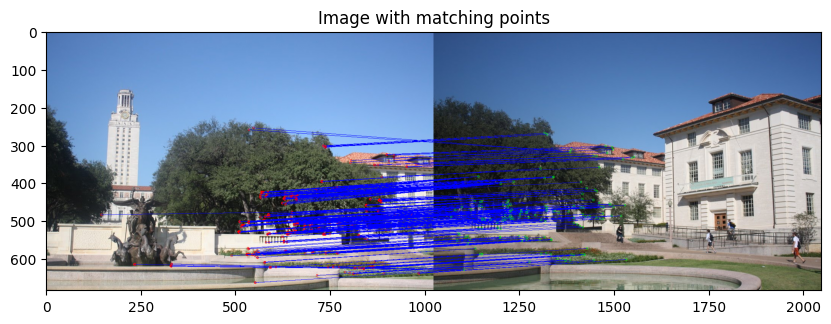

array([[[177, 115,  77],
        [177, 115,  77],
        [177, 115,  77],
        ...,
        [139,  82,  51],
        [139,  82,  51],
        [139,  82,  51]],

       [[177, 115,  77],
        [177, 115,  77],
        [177, 115,  77],
        ...,
        [139,  82,  51],
        [139,  82,  51],
        [139,  82,  51]],

       [[177, 115,  77],
        [177, 115,  77],
        [177, 115,  77],
        ...,
        [139,  82,  51],
        [139,  82,  51],
        [139,  82,  51]],

       ...,

       [[146, 166, 184],
        [149, 172, 188],
        [158, 178, 196],
        ...,
        [ 51,  85,  78],
        [ 53,  87,  80],
        [ 54,  88,  81]],

       [[141, 163, 181],
        [146, 168, 186],
        [153, 175, 193],
        ...,
        [ 52,  86,  79],
        [ 54,  88,  81],
        [ 56,  90,  83]],

       [[109, 130, 151],
        [115, 136, 157],
        [122, 143, 164],
        ...,
        [ 51,  88,  80],
        [ 54,  91,  83],
        [ 56,  93,  85]]

In [10]:
drawMatches(img1,img2,matches_pos)

In [11]:
H ,_ = cv.findHomography(dst_pts,src_pts, cv.RANSAC,5)

## RANSAC

In [12]:
import cv2
import numpy as np

def getHomography(kp1, kp2, Thresh, src_pts, dst_pts, img1, img2, matches):
    kp1_pts = np.float32([kp.pt for kp in kp1])
    kp2_pts = np.float32([kp.pt for kp in kp2])

    if len(matches) > 4:
        # With 2 sets of points
        src_pts = np.float32([kp1[m.queryIdx].pt for m in matches])
        dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches])

        # Estimate the homography between the sets of points
        H, status = cv.findHomography(dst_pts, src_pts, cv.RANSAC, Thresh)

        inliermatches = [m for m, s in zip(matches, status) if s == 1]
        outliermatches = [m for m, s in zip(matches, status) if s != 1]

        print(f"Total Inlier Matches: {len(inliermatches)}")
        print(f"Total Outlier Matches: {len(outliermatches)}")

        return H, status, inliermatches, outliermatches
    else:
        return None, [], [], []


Total Inlier Matches: 266
Total Outlier Matches: 179


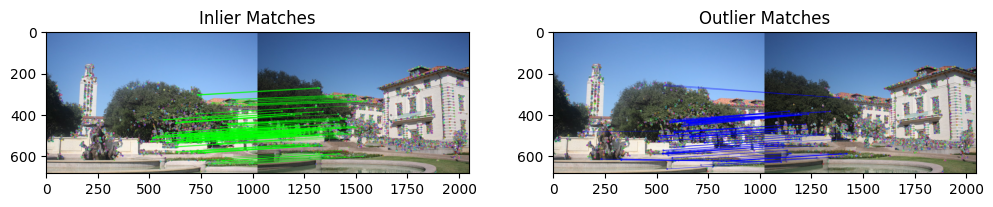

In [13]:
Threshold =4
H, status, inliermatches, outliermatches = getHomography(kp1, kp2, Threshold, src_pts, dst_pts, img1, img2, matches)


# Convert images to RGB format
img1rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Green line = inlier matches
inlier = cv2.drawMatches(img1rgb, kp1, img2rgb, kp2, inliermatches, None, matchColor=(0, 255, 0), singlePointColor=None, matchesMask=None, flags=cv2.DrawMatchesFlags_DEFAULT)

# Red line = outlier matches
outlier = cv2.drawMatches(img1rgb, kp1, img2rgb, kp2, outliermatches, None, matchColor=(0, 0, 255), singlePointColor=None, matchesMask=None, flags=cv2.DrawMatchesFlags_DEFAULT)

# Display the inlier and outlier images using Matplotlib
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(inlier)
plt.title('Inlier Matches')

plt.subplot(122)
plt.imshow(outlier)
plt.title('Outlier Matches')

plt.show()


In [14]:
#Thresh = 20
#H, status= getHomography(kp1, kp2, Thresh, src_pts, dst_pts, img2, img1, matches)

In [15]:
H, status = cv.findHomography(src_pts, dst_pts,cv.RANSAC,Threshold)
print("Estimated Homography Matrix:")
print(H)

Estimated Homography Matrix:
[[ 1.26911601e+00 -6.11762187e-02 -5.61388371e+02]
 [ 1.52677022e-01  1.21931358e+00 -1.60160743e+02]
 [ 2.44024779e-04  5.27655759e-05  1.00000000e+00]]


## Wrap and Blending

In [16]:
def resizeImage(img, target_size):
    return cv.resize(img, target_size)

def warpImages(img1, img2, H):

    max_width = max(img1.shape[1], img2.shape[1])
    max_height = max(img1.shape[0], img2.shape[0])

    img1 = resizeImage(img1, (max_width, max_height))
    img2 = resizeImage(img2, (max_width, max_height))

    rows1, cols1 = img1.shape[:2]
    rows2, cols2 = img2.shape[:2]

    pts1 = np.float32([[0, 0], [0, rows1], [cols1, rows1], [cols1, 0]]).reshape(-1, 1, 2)
    pts2 = np.float32([[0, 0], [0, rows2], [cols2, rows2], [cols2, 0]]).reshape(-1, 1, 2)

    pts2_ = cv.perspectiveTransform(pts2, H)

    pts = np.concatenate((pts1, pts2_), axis=0)

    [xmin, ymin] = np.int32(pts.min(axis=0).ravel() - 0.5)
    [xmax, ymax] = np.int32(pts.max(axis=0).ravel() + 0.5)

    M = np.array([[1, 0, -xmin], [0, 1, -ymin], [0, 0, 1]])

    img2_trans = cv.warpPerspective(img2, M.dot(H), (xmax - xmin, ymax - ymin))
    result_img=img2_trans.copy()
    result_img[-ymin:rows1 - ymin, -xmin:cols1 - xmin] = img1

    (h1, w1) = img2_trans.shape[:2]
    print(img2_trans.shape[:2])
    (h2, w2) = result_img.shape[:2]
    print(result_img.shape[:2])
    print(img1.shape[:2])


    img2_trans_mask = np.zeros((h1, w1), dtype="int")
    result_img_mask = np.zeros((h2, w2), dtype="int")
    img_mask1= np.zeros((h1, w1), dtype="int")
    img_right_mask= np.zeros((h1, w1), dtype="int")

    # find the img2 tran on img1 domain image mask region(Those not zero pixels)
    for i in range(h1):
        for j in range(w1):
            if np.count_nonzero(img2_trans[i, j]) > 0:
                img2_trans_mask[i, j] = 1

    fig, axs = plt.subplots(3,2,figsize=(10,12 ))
    fig.suptitle('image masks')
    #plt.figure(figsize=(10, 15))
    axs[0, 0].imshow(img2_trans_mask.astype(int), cmap="gray")
    axs[0, 0].title.set_text('mask of left image in right image `s space ')

    # find the result image mask region(Those not zero pixels)
    for i in range(h2):
        for j in range(w2):
            if np.count_nonzero(result_img[i, j]) > 0:
                img_right_mask[i, j] = 1
    axs[0, 1].imshow(img_right_mask.astype(int), cmap="gray")
    axs[0, 1].title.set_text('warp image mask')


    for i in range(h2):
        for j in range(w2):
            if np.count_nonzero(result_img[i, j]) > 0:
                if np.count_nonzero(img2_trans[i, j]) == 0:
                    img_mask1[i, j] = 1
    axs[1, 0].imshow(img_mask1.astype(int), cmap="gray")
    axs[1, 0].title.set_text('mask of right image not intersect to left image')


    img1_mask = np.zeros((h1, w1), dtype="int")
    img1_mask[-ymin:rows1 - ymin, -xmin:cols1 - xmin] = 1
    # find the image1 mask region(Those not zero pixels)
    axs[1, 1].imshow(img1_mask.astype(int), cmap="gray")
    axs[1, 1].title.set_text('mask of right image')

    img_mask_overlap = np.zeros((h1, w1), dtype="int")
    for i in range(h1):
        for j in range(w1):
            if np.count_nonzero(img1_mask[i, j]) > 0:
                if np.count_nonzero(img_mask1[i, j]) == 0:
                    img_mask_overlap[i, j] = 1
    axs[2, 0].imshow(img_mask_overlap.astype(int), cmap="gray")
    axs[2, 0].title.set_text('Mask of right image intersect to left image')

    # compute the alpha mask to linear blending the overlap region
    alpha_mask = np.zeros((h1, w1)) # alpha value depend on left image
    for i in range(h1):
        minIdx = maxIdx = -1
        for j in range(w1):
            if (img_mask_overlap[i, j] == 1 and minIdx == -1):
                minIdx = j
            if (img_mask_overlap[i, j] == 1):
                maxIdx = j

        if (minIdx == maxIdx): # represent this row's pixels are all zero, or only one pixel not zero
            continue

        decrease_step = 1 / (maxIdx - minIdx)
        for j in range(minIdx, maxIdx + 1):
            alpha_mask[i, j] = 1 - (decrease_step * (j - minIdx))
    axs[2, 1].imshow(alpha_mask.astype(int), cmap="gray")
    axs[2, 1].title.set_text(' mask of alpha')

    linearBlending_img = np.copy(img2_trans)
    linearBlending_img[:h1, :w1] = np.copy(result_img)
    # linear blending
    for i in range(h1):
        for j in range(w1):
            if ( np.count_nonzero(img_mask_overlap[i, j]) > 0):
                linearBlending_img[i, j] = alpha_mask[i, j] * img2_trans[i, j] + (1 - alpha_mask[i, j]) * result_img[i, j]
#     apply guassian blur
#     alpha_mask = np.clip(alpha_mask, 0, 1)  # Ensure alpha values are in the [0, 1] range

#     # Linear blending
#     linearBlending_img = np.copy(img2_trans)
#     linearBlending_img[:h1, :w1] = np.copy(result_img)


#     gaussian_kernel = cv.getGaussianKernel(11, 1.5)
#     gaussian_kernel = gaussian_kernel * gaussian_kernel.T


#     for i in range(h1):
#         for j in range(w1):
#             if img_mask_overlap[i, j] == 1:
#                 alpha = alpha_mask[i, j]

#
#                 kernel_size = gaussian_kernel.shape[0]
#                 offset = kernel_size // 2
#                 for m in range(-offset, offset + 1):
#                     for n in range(-offset, offset + 1):
#                         if 0 <= i + m < h1 and 0 <= j + n < w1:
#                             linearBlending_img[i + m, j + n] = (
#                                 alpha * gaussian_kernel[m + offset, n + offset] * img2_trans[i + m, j + n] +
#                                 (1 - alpha * gaussian_kernel[m + offset, n + offset]) * result_img[i + m, j + n]
#                             )

#     linearBlending_img = np.clip(linearBlending_img, 0, 255).astype(np.uint8)

    return linearBlending_img,result_img

(834, 1662)
(834, 1662)
(683, 1024)


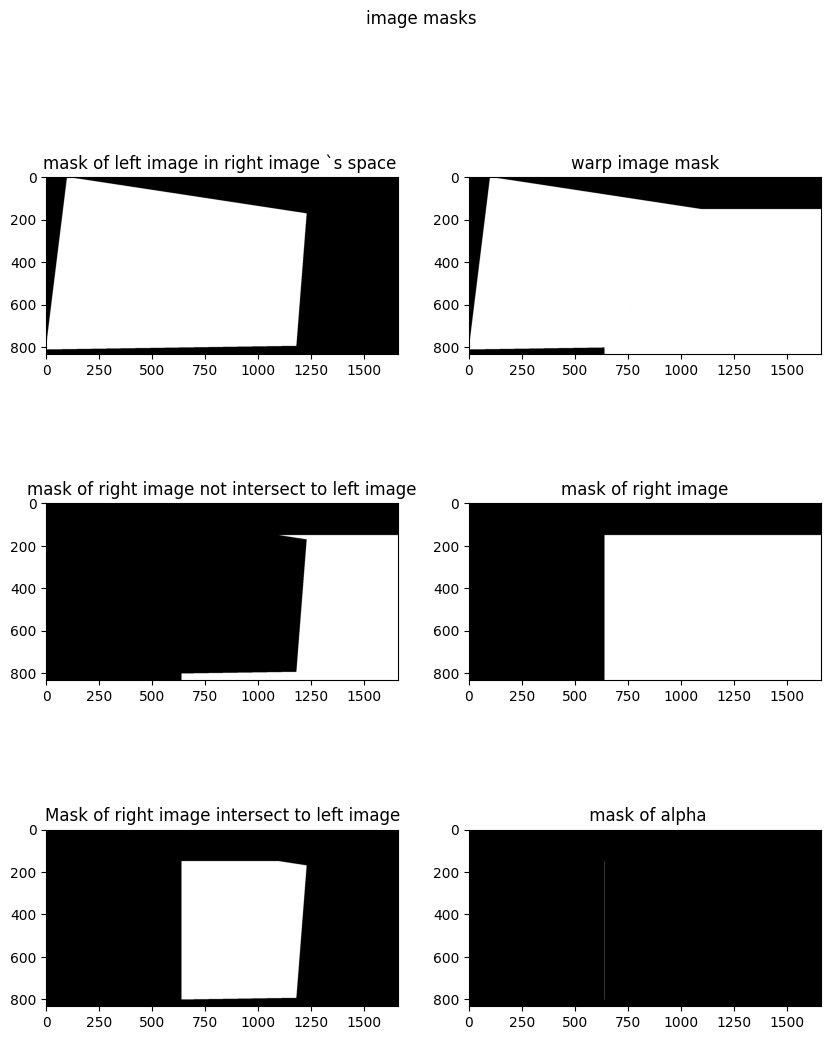

In [17]:
## Right image is reference images , left is the transform images.
image_paths_right='image pairs_03_01.jpg'
image_paths_left='image pairs_03_02.jpg'
img1 = cv.imread(image_paths_left)
img2 = cv.imread(image_paths_right)
kp1, desc1,result_img1 = get_sift_descriptors(img1)
kp2, desc2,result_img2 = get_sift_descriptors(img2)
matches,src_pts,dst_pts,matches_pos=matchKeyPoint(kp1, kp2, desc1, desc2, ratio=0.9)
H, status = cv.findHomography(dst_pts,src_pts,cv.RANSAC,Threshold)
linearBlending_img,result_img = warpImages(img1, img2, H)

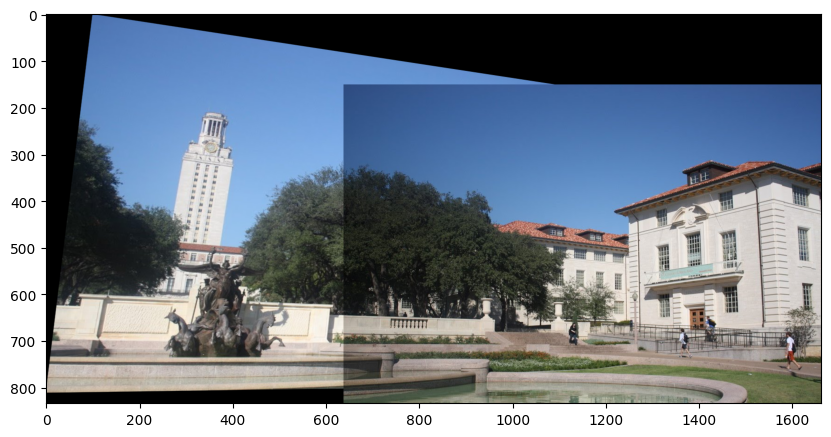

In [18]:
plt.figure(figsize=(10, 15))
plt.imshow(cv.cvtColor(result_img, cv.COLOR_BGR2RGB))

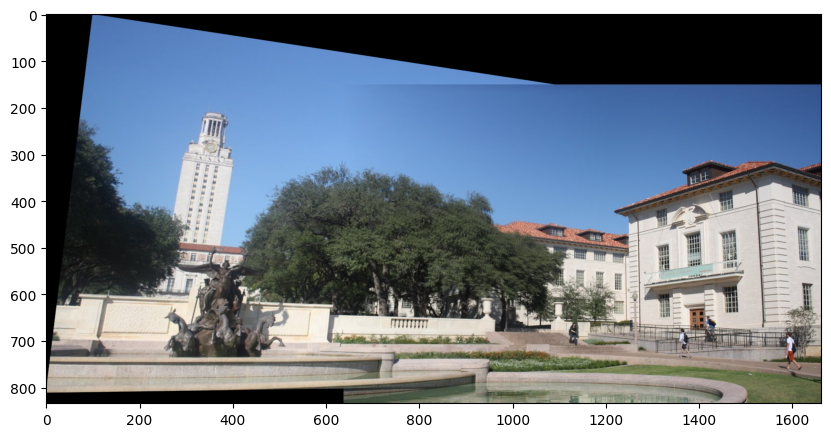

In [19]:
plt.figure(figsize=(10, 15))
plt.imshow(cv.cvtColor(linearBlending_img, cv.COLOR_BGR2RGB))
